M. Lukoševičius (2012): A Practical Guide to Applying Echo State Networks. In: G. Montavon, G. B. Orr, and K.-R. Müller (eds.) Neural
Networks: Tricks of the Trade, 2nd ed. Springer LNCS 7700, pp 659-686 (http://minds.jacobs-university.de/sites/default/files/uploads/papers/PracticalESN.pdf
) , -- you can skip Sections 4.3, 4.4, 4.6, 4.7, 4.8, 4.9, 5.3. And then try to set up and train an ESN which...

- has no input and only a single output neuron
- the learning objective is to train this ESN to generate a sinewave in its output node
- this requires to set up the ESN with output feedback and teacher forcing (Section 5 in the paper above)
- the sinewave teacher signal should have a period length of about 10 discrete time steps per full oscillation
- the reservoir should have 100 neurons and you don't need leaky integrator units for this task


1. Generate a large random reservoir RNN (Win, W, a)
2. run it using the training input u(n) and collect the corresponding reservoir activation states x(n)
3. compute the linear readout weights Wout from the reservoir using linear regression, minimizing the MSE between y(n) and ytarget(n) 
4. use the trained network on new input data u(n) computing y(n) by employing the trained output weights Wout

In [1]:
from numpy import *
from matplotlib.pyplot import *
import scipy.linalg

In [31]:
# generate the ESN reservoir
initLen = 800
inSize = outSize = 1
resSize = 500

In [32]:
random.seed(42)
Win = (random.rand(resSize,inSize)-0.5) * 2
W = random.rand(resSize,resSize)-0.5 

In [33]:
Win.shape

(500, 1)

In [34]:
rhoW = max(abs(linalg.eig(W)[0]))
W *= 1.25 / rhoW

In [35]:
print(rhoW)

6.59857398577


In [36]:
W.shape

(500, 500)

In [37]:
D = zeros((initLen, inSize))

In [38]:
for n in range(initLen):
    d = (sin(2*pi*n/10))
    D[n,:] = d

In [39]:
D.shape

(800, 1)

In [40]:
x = np.zeros((resSize, inSize))
X = np.zeros([resSize, initLen])

In [41]:
for i in range(initLen):
    x = tanh(dot(Win, D[i]).reshape(resSize, inSize)+dot(W, x))
    X[:, i] = x[:,0]

In [42]:
b = 2

In [43]:
Wout = np.transpose(np.dot(np.dot(linalg.inv(np.dot(X, X.T)+ np.dot(b, np.identity(resSize))), X), D))

In [44]:
Y = np.zeros((initLen, outSize))

In [45]:
for t in range(initLen):
    x = tanh(dot(Win, D[t]).reshape(resSize, inSize)+dot(W, x))    
    y = dot(Wout, x)
    Y[t,:] = y

In [46]:
etrain = 0
for w in range(initLen):
    etrain += pow((Y[w] - D[w]),2)
etrain = etrain / initLen

In [47]:
etrain

array([  1.09466794e-09])

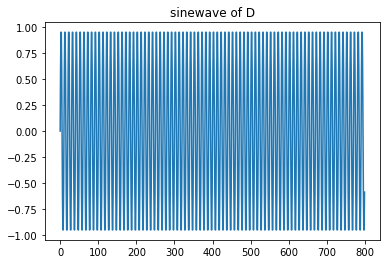

In [48]:
figure(1).clear()
plot(D)
title('sinewave of D')
show()

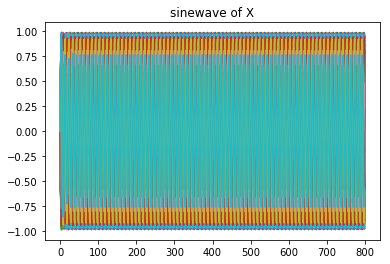

In [49]:
figure(2).clear()
plot(X.T)
title('sinewave of X')
show()

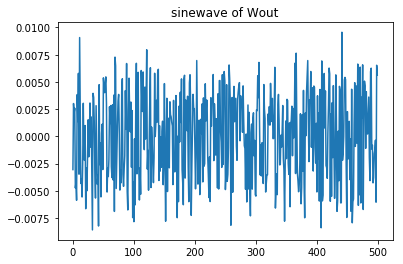

In [50]:
figure(3).clear()
plot(Wout.T)
title('sinewave of Wout')
show()

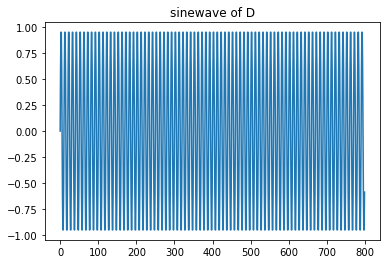

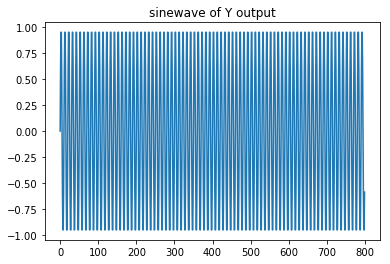

In [51]:
figure(1).clear()
plot(D)
title('sinewave of D')
show()
figure(4).clear()
plot(Y)
title('sinewave of Y output')
show()